In [2]:
import pandas as pd
import os
from enum import Enum
from typing import List

class MovieDataLoader:
    def __init__(self, file_path: str):
        self.file_path = file_path
        self.extension = os.path.splitext(file_path)[1]
        self.dataframe = None

    def load(self) -> pd.DataFrame:
        self.dataframe = pd.read_csv(
            self.file_path,
            sep='\t' if self.extension == '.txt' else ','
        )
        return self.dataframe

class DB(Enum):
    CASTINGS = 0
    COUNTRIES = 1
    GENRES = 2
    RATES = 3
    MOVIES = 4
    PEOPLES = 5

def get_dataframes() -> List[pd.DataFrame]:
    base_path = "../data/kmrd/kmr_dataset/datafile/kmrd-small"
    db_name = ["castings.csv", "countries.csv", "genres.csv", "rates.csv", "movies.txt", "peoples.txt"]
    db_paths = [os.path.join(base_path, name) for name in db_name]
    return [MovieDataLoader(path).load() for path in db_paths]

In [5]:
dataframes = get_dataframes()
castings_df = dataframes[DB.CASTINGS.value]
countries_df = dataframes[DB.COUNTRIES.value]
genres_df = dataframes[DB.GENRES.value]
rates_df = dataframes[DB.RATES.value]
movies_df = dataframes[DB.MOVIES.value]

print(castings_df.head())

   movie  people  order  leading
0  10001    4374      1        1
1  10001     178      2        1
2  10001    3241      3        1
3  10001   47952      4        1
4  10001   47953      5        0


In [4]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# D2Coding 폰트 경로 설정
font_path = "../D2Coding.ttf"
fontprop = fm.FontProperties(fname=font_path)

# 폰트 설정
plt.rc("font", family=fontprop.get_name())
plt.rcParams.update({"font.size": 14})  # Set the font size to 14
plt.figure(figsize=(19, 10))


<Figure size 1900x1000 with 0 Axes>

<Figure size 1900x1000 with 0 Axes>

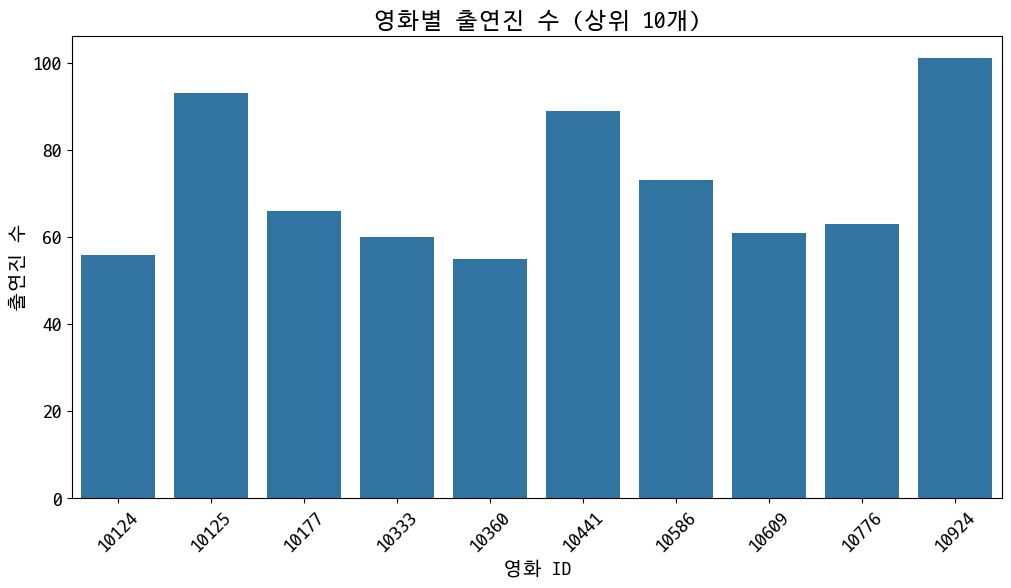

In [76]:
import seaborn as sns

# 1. 영화별 출연진 수 (상위 10개)
plt.figure(figsize=(12, 6))
casting_counts = castings_df['movie'].value_counts().head(10)
sns.barplot(x=casting_counts.index, y=casting_counts.values)
plt.title('영화별 출연진 수 (상위 10개)')
plt.xlabel('영화 ID')
plt.ylabel('출연진 수')
plt.xticks(rotation=45)
plt.show()

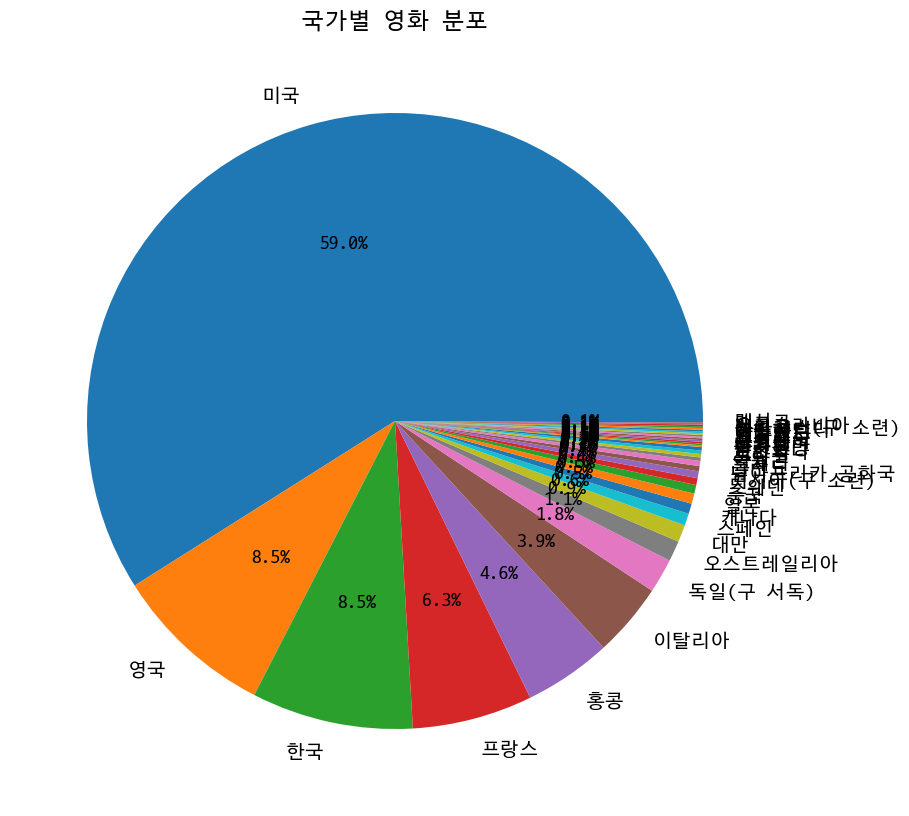

In [65]:

# 2. 국가별 영화 수
plt.figure(figsize=(10, 10))
country_counts = countries_df['country'].value_counts()
plt.pie(country_counts.values, labels=country_counts.index, autopct='%1.1f%%')
plt.title('국가별 영화 분포')
plt.show()

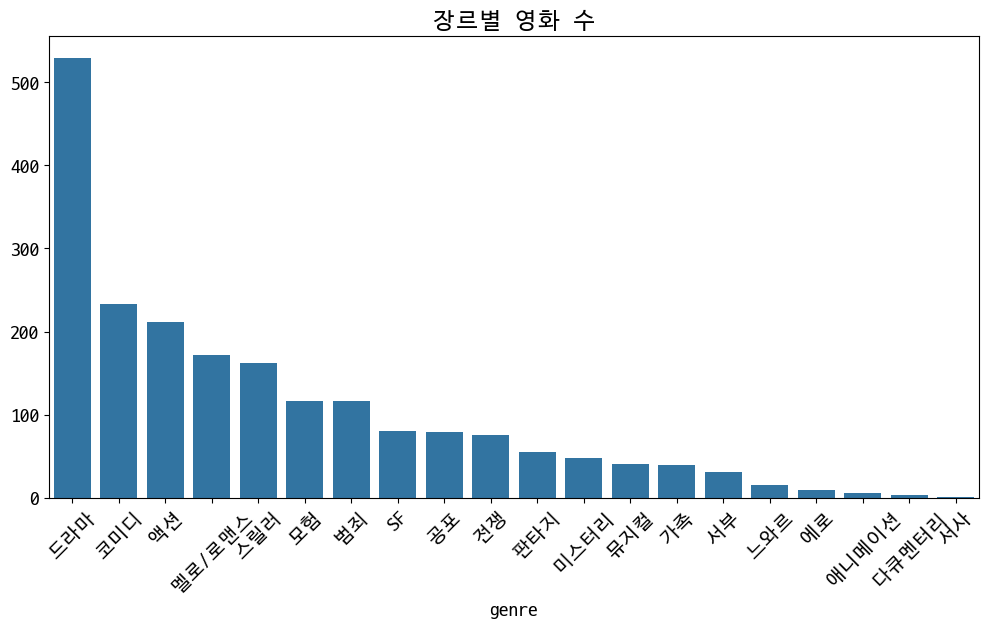

In [66]:
# 3. 장르별 영화 수
plt.figure(figsize=(12, 6))
genre_counts = genres_df['genre'].value_counts()
sns.barplot(x=genre_counts.index, y=genre_counts.values)
plt.title('장르별 영화 수')
plt.xticks(rotation=45)
plt.show()

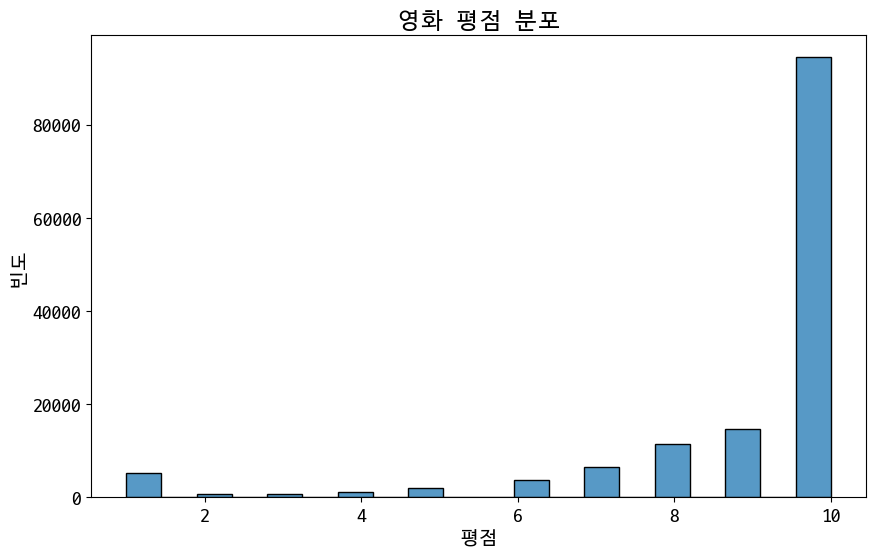

In [67]:
# 4. 평점 분포
plt.figure(figsize=(10, 6))
sns.histplot(data=rates_df, x='rate', bins=20)
plt.title('영화 평점 분포')
plt.xlabel('평점')
plt.ylabel('빈도')
plt.show()

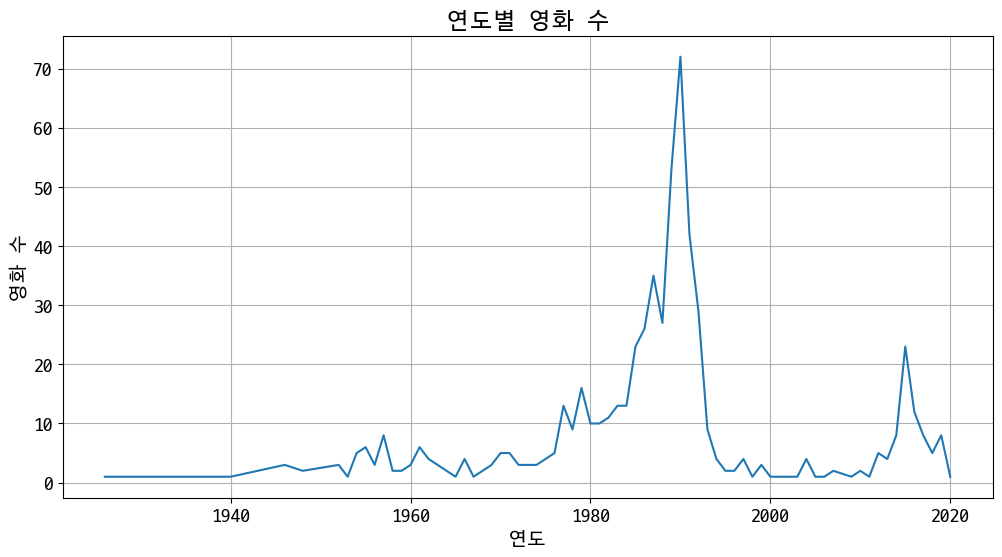

In [68]:
# 5. 연도별 영화 수
plt.figure(figsize=(12, 6))
movies_df['year'] = pd.to_numeric(movies_df['year'], errors='coerce')
year_counts = movies_df['year'].value_counts().sort_index()
plt.plot(year_counts.index, year_counts.values)
plt.title('연도별 영화 수')
plt.xlabel('연도')
plt.ylabel('영화 수')
plt.grid(True)
plt.show()

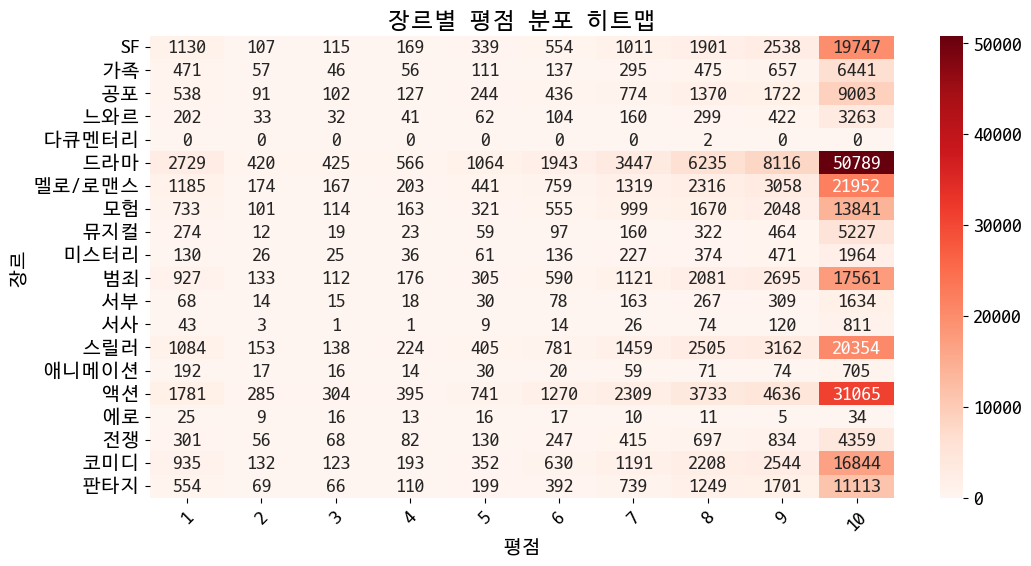

In [69]:
import seaborn as sns
import numpy as np

# 데이터 전처리
merged_df = pd.merge(rates_df, genres_df, on='movie')

# 피벗 테이블 생성
pivot_table = merged_df.pivot_table(index='genre', columns='rate', values='movie', aggfunc='count', fill_value=0)

# 히트맵 그리기
plt.figure(figsize=(12, 6))
sns.heatmap(pivot_table, annot=True, fmt='d', cmap='Reds')
plt.title('장르별 평점 분포 히트맵')
plt.xlabel('평점')
plt.ylabel('장르')
plt.xticks(rotation=45)
plt.show()